# SFR & Kennicutt-Schmidt law

In [1]:
import os
import numpy as np
from IPython.display import Image
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


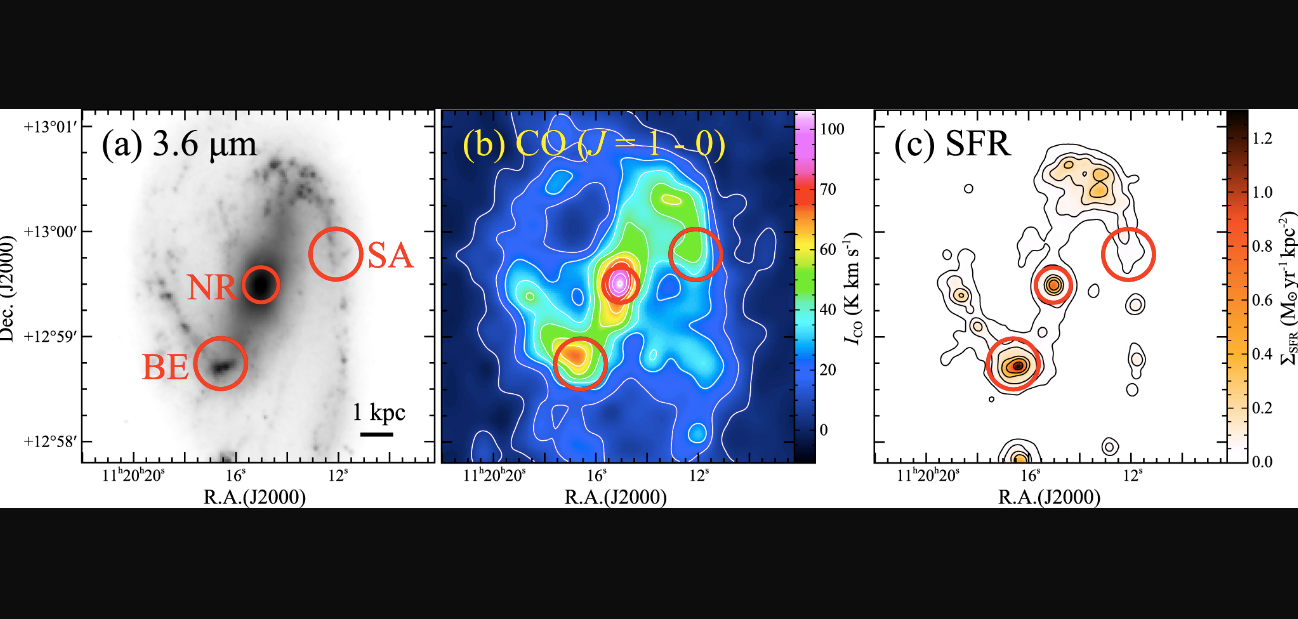

In [2]:
Image(filename='./images/CO_SFR.png')

### SFR

 $$\frac{SFR}{M_{\odot}yr^{-1}} = 5.37\times 10^{-42} \frac{L_{H\alpha}}{erg \times s^{-1}}$$

$$\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}] $$

$$L(H_{\alpha}) = 4\pi (3.086\times 10^{24} d_L)^2 f(H_{\alpha})$$, where f(Hα) is the integrated flux in ergs s-1 cm-2 and dL is the luminosity distance in Mpc

In [3]:
Distance = 9.3
H_alpha = np.load('./data/H_alpha.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [4]:
scale = (Distance*1000*2*np.pi)/(360*60*60.) # kpc/acrsec
print(scale)
#d_L = scale*800

0.04508767234318684


In [5]:
SFR = np.zeros(dist_kpc.shape)
SFR = 5.37 * 1000**2 * 4 * np.pi * (3.086 * Distance)**2 * H_alpha 

In [6]:
Sigma_SFR = np.zeros(dist_kpc.shape)
Sigma_SFR = SFR/(scale)**2

In [7]:
np.save('./data/Sigma_SFR.npy',Sigma_SFR)

/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$\\Sigma_{SFR}$')

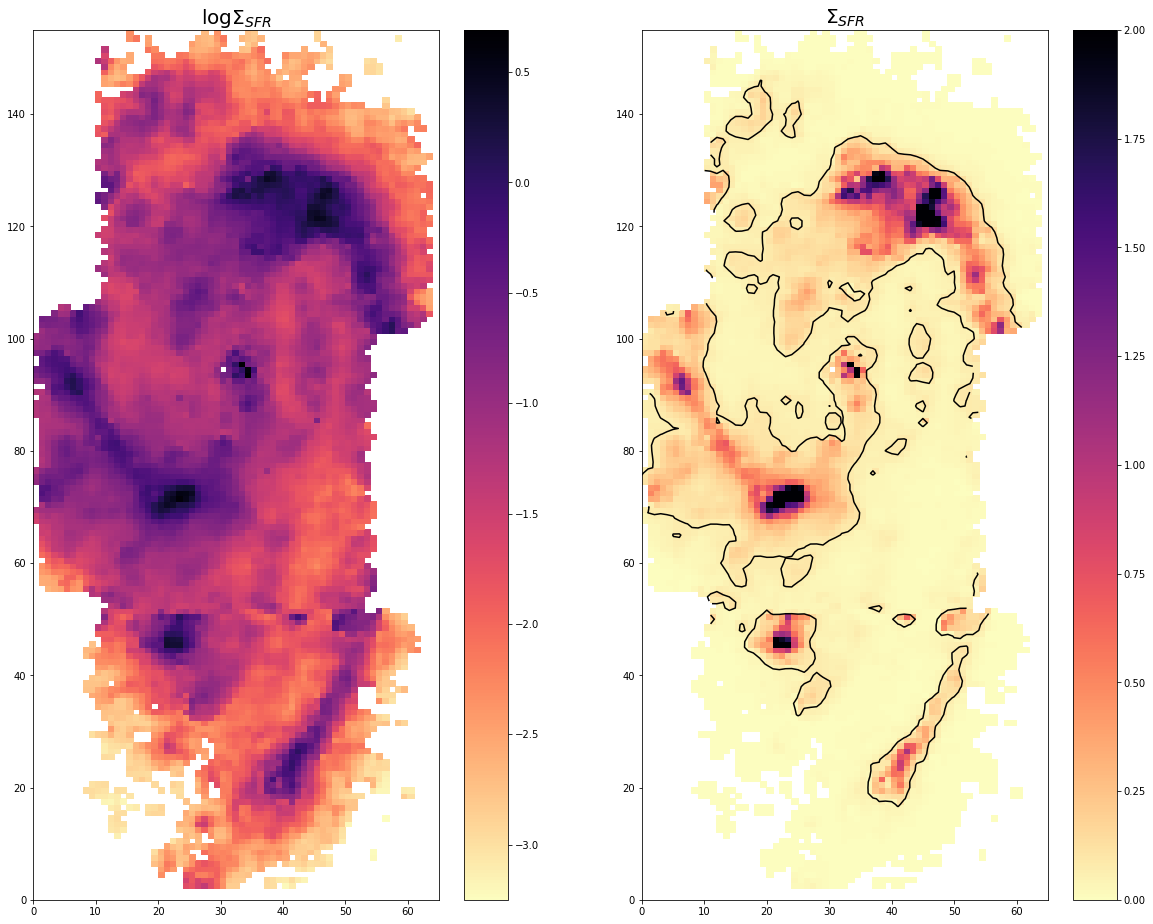

In [8]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[20, 16])
plt.subplot(1,2,1)

#CS = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.6,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, np.log10(Sigma_SFR), cmap='magma_r')

quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\log{\Sigma_{SFR}}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.08,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, Sigma_SFR, cmap='magma_r')
quadmesh.set_clim(vmin=0.,vmax = 2.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\Sigma_{SFR}$', fontsize=20)

Правая картинка(без логарифма) похожа на ту, которую я представила вверху из [этой статьи](https://arxiv.org/pdf/1904.12430.pdf)

Загрузим карту с ошибками

In [9]:
from astropy.io import fits

In [10]:
data=fits.getdata('./data/NGC3627_map_ha_corr_err.fits')             
data=np.nan_to_num(data)
Halpha_err_ = np.array(data).reshape(data.shape)


In [11]:
Halpha_err = Halpha_err_[5:,3:-1]

In [12]:
np.save('./data/H_alpha_err.npy', Halpha_err)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5, 1.0, '$H_{\\alpha}$')

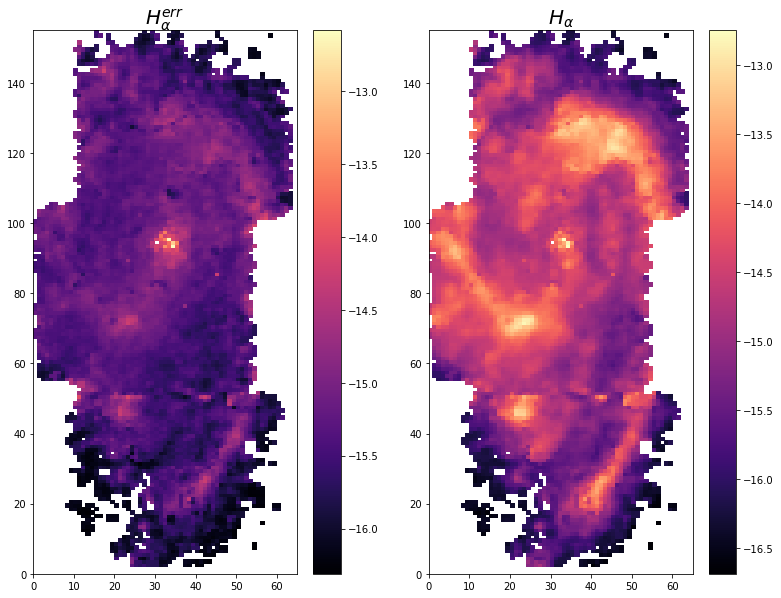

In [13]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[13, 10])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, np.log10(Halpha_err), cmap='magma')
plt.colorbar()
plt.title(r'$H_{\alpha}^{err}$', fontsize=20)

plt.subplot(1,2,2)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
quadmesh = plt.pcolormesh(X, Y, np.log10(H_alpha), cmap='magma')
plt.colorbar()
plt.title(r'$H_{\alpha}$', fontsize=20)

Относительная ошибка

In [14]:
SFR_rel_err = np.zeros(H_alpha.shape)
SFR_rel_err = Halpha_err/H_alpha

Text(0.5, 1.0, '$SFR^{err}$')

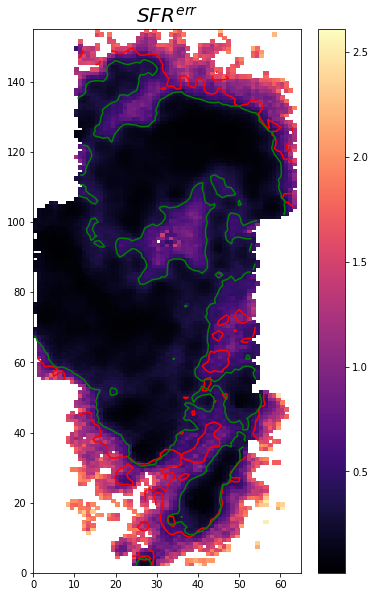

In [15]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[6, 10])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.01,],aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, SFR_rel_err, levels=[0.,0.4],aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, SFR_rel_err, cmap='magma')
plt.colorbar()
plt.title(r'$SFR^{err}$', fontsize=20)

Абсолютная ошибка 

**NB: здесь было 4.5 вместо 9.3!**

In [16]:
SFR_abs_err = np.zeros(H_alpha.shape)
SFR_abs_err_ = 5.37 * 1000**2 * 4 * np.pi * (3.086 * Distance)**2 * Halpha_err 
SFR_abs_err = SFR_abs_err_/(scale)**2

Text(0.5, 1.0, '$SFR^{err}$')

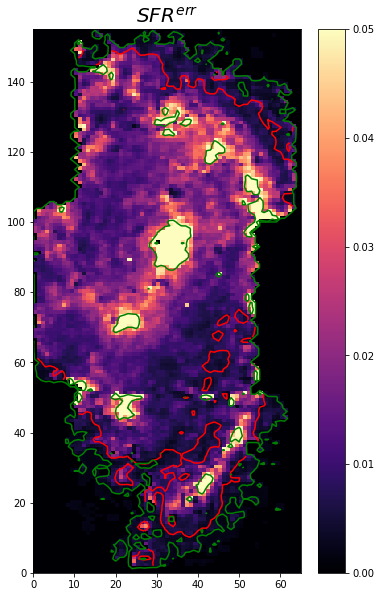

In [17]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[6, 10])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.01,],aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, SFR_abs_err, levels=[0.0025, 0.05],aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, SFR_abs_err, cmap='magma')
plt.colorbar()
quadmesh.set_clim(vmin=0.,vmax = 0.05)
plt.title(r'$SFR^{err}$', fontsize=20)

/home/lera/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lera/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


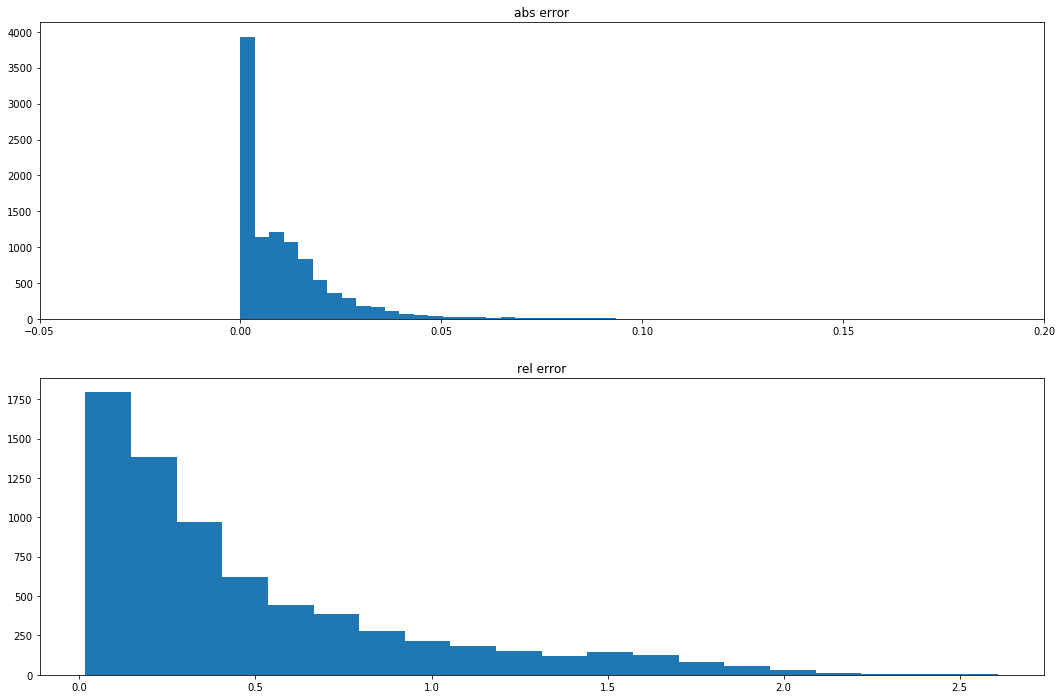

In [18]:
plt.figure(figsize=[18, 12])
plt.subplot(2,1,1)
plt.hist(np.ravel(SFR_abs_err), bins = 2000,cumulative = False)
plt.xlim(-0.05,0.2)
plt.title('abs error')

plt.subplot(2,1,2)
plt.hist(np.ravel(SFR_rel_err), bins = 20)
#plt.xlim(0,0.7)
plt.title('rel error')
plt.show()

In [19]:
np.min(SFR_abs_err[SFR_abs_err>0.])

0.001337570971249977

Т.е. минимальная ошибка - примерно 0.001.

In [20]:
np.min(Sigma_SFR[Sigma_SFR>0.])

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


0.0005624501904884813

In [21]:
np.log10(0.001337)

-2.8738685927380154

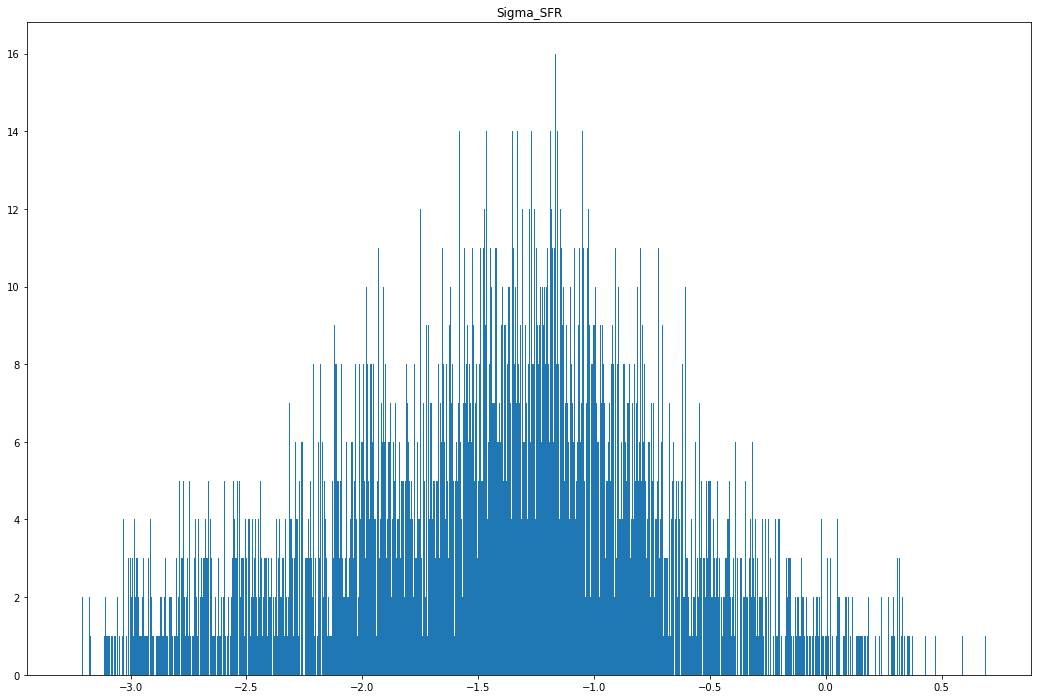

In [22]:
plt.figure(figsize=[18, 12])
plt.hist(np.ravel(np.log10(Sigma_SFR)), bins = 2000,cumulative = False)
# plt.xlim(-0.05,0.2)
plt.title('Sigma_SFR')
plt.show()

Т.е. разумно брать интервал [-3., 0.5].

### Изобразим закон К-Ш для полной и обрезанной карты

$$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$$, где $N=1.4,1.5$ 

Пусть $\Sigma_{SFR} = k\cdot {\Sigma_{gas}}^N$, тогда $\log{H_{\alpha}} = \log{k}+N\cdot log{\Sigma_{gas}}$

In [23]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
H_alpha = np.load('./data/H_alpha.npy')

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


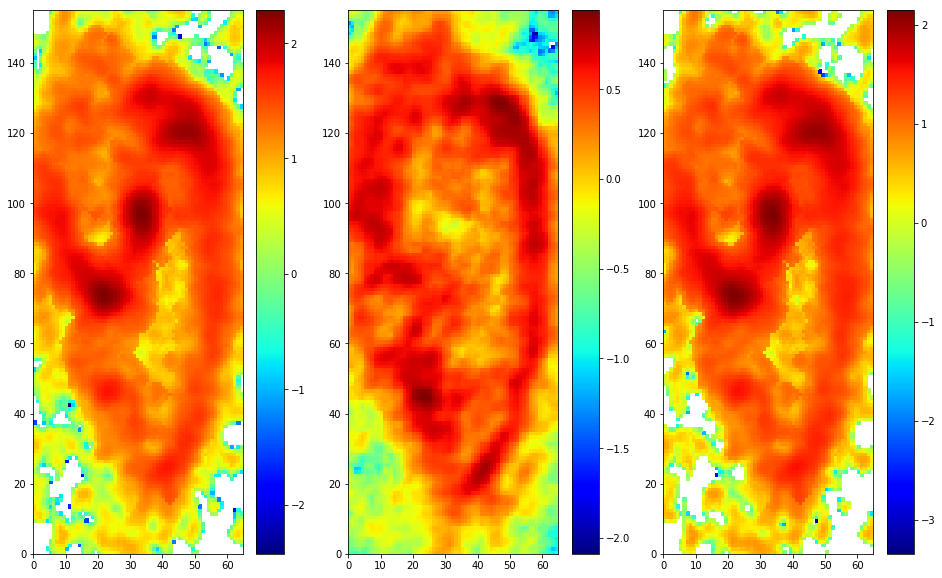

In [24]:
mask = (H_alpha != 0.)
Sigma_g = np.zeros(dist_kpc.shape)
Sigma_g = 1.36*(Sigma_HI + Sigma_H2)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[16,10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_g), cmap='jet')
plt.colorbar()
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_HI), cmap='jet')
plt.colorbar()
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_H2), cmap='jet')
plt.colorbar()

In [25]:
from scipy import stats

$$log(\Sigma_{gas}) = \alpha \times log(\Sigma_{SFR}) + \beta$$
$$log(\Sigma_{SFR}) = \dfrac{1}{\alpha} \times log(\Sigma_{gas}) - \dfrac{\beta}{\alpha}$$

In [31]:
counts_gas = np.zeros((70,36)) 
counts_gas_cut = np.zeros((70,36))
x=[]
y=[]
x_cut=[]
y_cut=[]

for j, gas in enumerate(np.linspace(0.4, 2.2, 36)):
    for i, hlim in enumerate(np.linspace(-3.0, 0.5, 70)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.) & (Sigma_SFR[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_gas[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                
                if (k>60) & (H_alpha[k][l] != 0.) & (Sigma_SFR[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_gas_cut[i][j]+=1
                        x_cut.append(np.log10(Sigma_g[k][l]))
                        y_cut.append(np.log10(Sigma_SFR[k][l]))

gradient1, intercept1, r_value, p_value, std_err = stats.linregress(y,x)  
a1 =1. / gradient1
b1 = -intercept1/gradient1
gradient2, intercept2, r_value, p_value, std_err = stats.linregress(y_cut,x_cut)  
a2 =1. / gradient2
b2 = -intercept2/gradient2
                        

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


In [33]:
counts_H2 = np.zeros((70,36)) 
counts_H2_cut = np.zeros((70,36))
x=[]
y=[]
x_cut=[]
y_cut=[]

for j, gas in enumerate(np.linspace(0.3, 2.1, 36)):
    for i, hlim in enumerate(np.linspace(-3.0, 0.5, 70)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.) & (Sigma_SFR[k][l] != 0.):
                    if (gas <= np.log10(Sigma_H2[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_H2[i][j]+=1
                        x.append(np.log10(Sigma_H2[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                
                if (k>60) & (H_alpha[k][l] != 0.) & (Sigma_SFR[k][l] != 0.):
                    if (gas <= np.log10(Sigma_H2[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_H2_cut[i][j]+=1
                        x_cut.append(np.log10(Sigma_H2[k][l]))
                        y_cut.append(np.log10(Sigma_SFR[k][l]))

gradient3, intercept3, r_value, p_value, std_err = stats.linregress(y,x)  
a3 =1. / gradient3
b3 = -intercept3/gradient3
gradient4, intercept4, r_value, p_value, std_err = stats.linregress(y_cut,x_cut)  
a4 =1. / gradient4
b4 = -intercept4/gradient4

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


In [34]:
counts_HI = np.zeros((70,36)) 
counts_HI_cut = np.zeros((70,36))
x=[]
y=[]
x_cut=[]
y_cut=[]

for j, gas in enumerate(np.linspace(-0.8, 1., 36)):
    for i, hlim in enumerate(np.linspace(-3.0, 0.5, 70)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.) & (Sigma_SFR[k][l] != 0.):
                    if (gas <= np.log10(Sigma_HI[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_HI[i][j]+=1
                        x.append(np.log10(Sigma_HI[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                
                if (k>60) & (H_alpha[k][l] != 0.) & (Sigma_SFR[k][l] != 0.):
                    if (gas <= np.log10(Sigma_HI[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_HI_cut[i][j]+=1
                        x_cut.append(np.log10(Sigma_HI[k][l]))
                        y_cut.append(np.log10(Sigma_SFR[k][l]))

gradient5, intercept5, r_value, p_value, std_err = stats.linregress(y,x)  
a5 =1. / gradient5
b5 = -intercept5/gradient5
gradient6, intercept6, r_value, p_value, std_err = stats.linregress(y_cut,x_cut)  
a6 =1. / gradient6
b6 = -intercept6/gradient6

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


Нарисуем закон К-Ш почти для полной и обрезанной карты

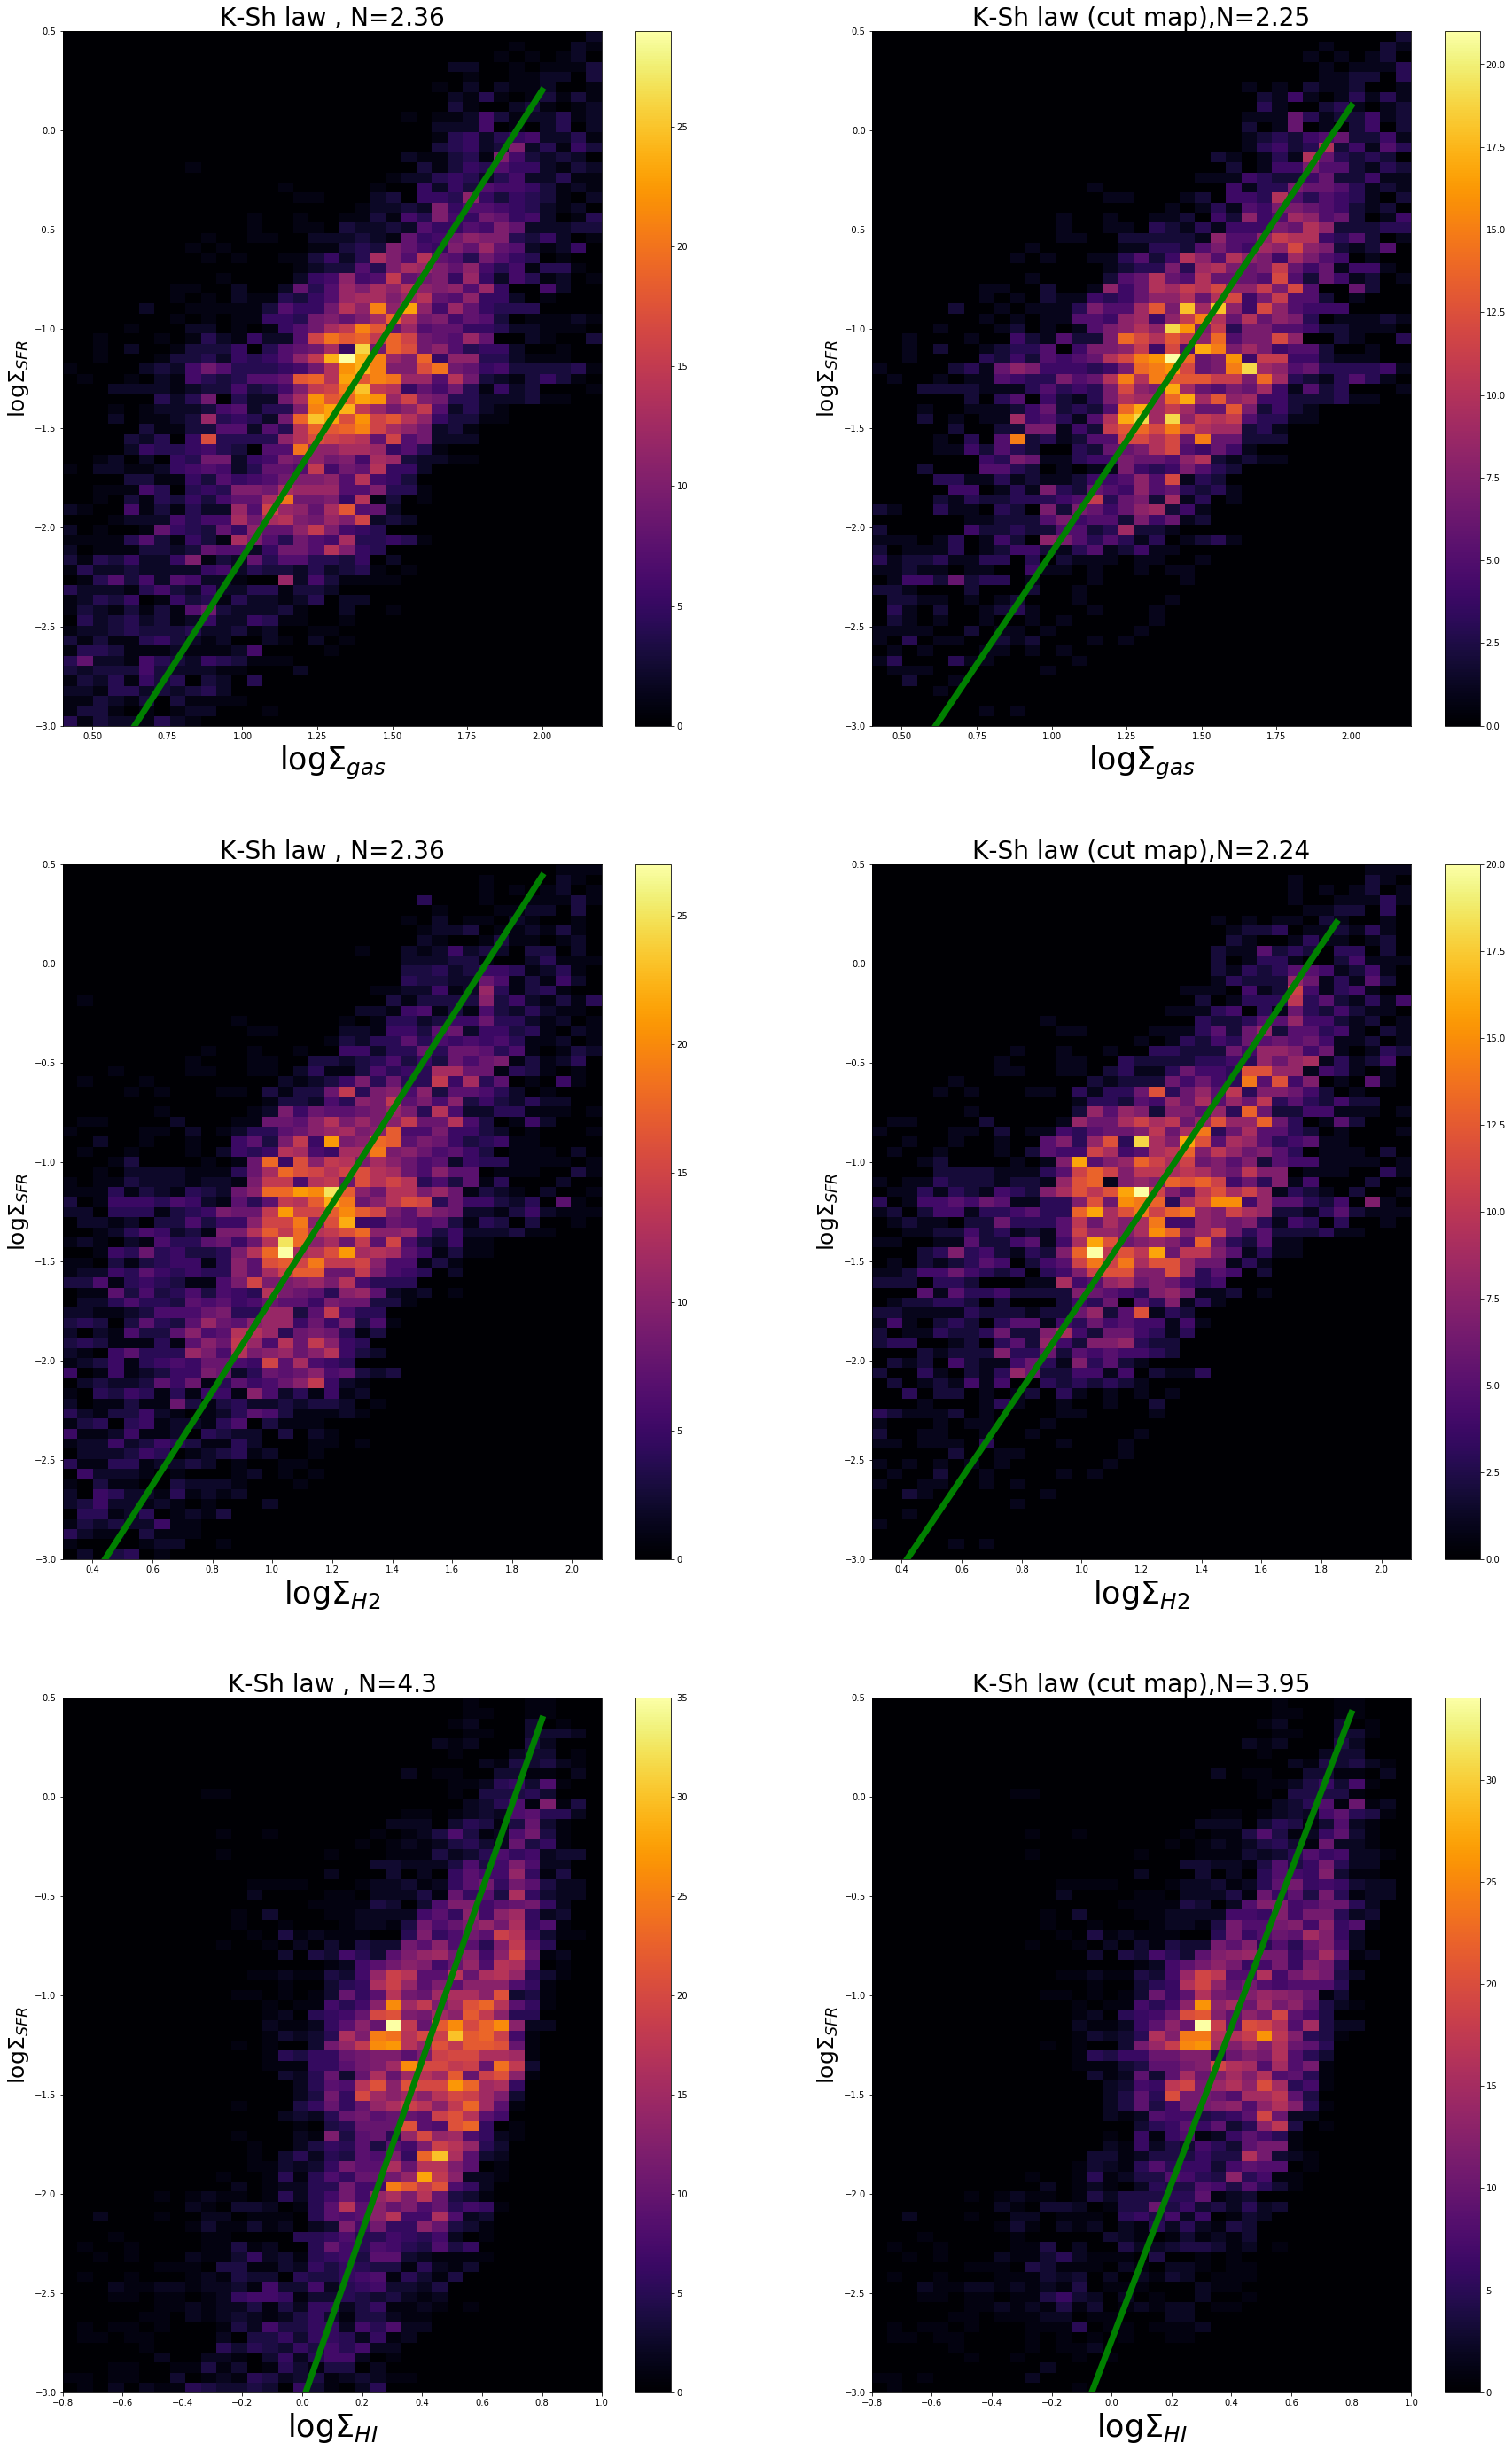

In [41]:
xx, yy = np.meshgrid(np.linspace(0.4, 2.2, 36),np.linspace(-3., 0.5, 70))
fig = plt.figure(figsize=[30, 49])

plt.subplot(3,2,1)
quadmesh = plt.pcolormesh(xx, yy, counts_gas, cmap='inferno')
a01 = (-3. - b1)/a1
plt.plot([a01, 2.], [a01*a1+b1, 2.*a1+b1], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 35)
plt.title('K-Sh law , N='+str(2.36), fontsize=28)
plt.colorbar()
          
plt.subplot(3,2,2)
quadmesh = plt.pcolormesh(xx, yy, counts_gas_cut, cmap='inferno')
a02 = (-3. - b2)/a2
plt.plot([a02, 2.], [a02*a2+b2, 2.*a2+b2], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 35)
plt.title('K-Sh law (cut map),N='+str(2.25), fontsize=28)
plt.colorbar()

xx, yy = np.meshgrid(np.linspace(0.3, 2.1, 36),np.linspace(-3., 0.5, 70))
plt.subplot(3,2,3)
quadmesh = plt.pcolormesh(xx, yy, counts_H2, cmap='inferno')
a01 = (-3. - b3)/a3
plt.plot([a01, 1.9], [a01*a3+b3, 1.9*a3+b3], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{H2}}$', fontsize = 35)
plt.title('K-Sh law , N='+str(2.36), fontsize=28)
plt.colorbar()
          
plt.subplot(3,2,4)
quadmesh = plt.pcolormesh(xx, yy, counts_H2_cut, cmap='inferno')
a02 = (-3. - b4)/a4
plt.plot([a02, 1.85], [a02*a4+b4, 1.85*a4+b4], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{H2}}$', fontsize = 35)
plt.title('K-Sh law (cut map),N='+str(2.24), fontsize=28)
plt.colorbar()

xx, yy = np.meshgrid(np.linspace(-0.8, 1., 36),np.linspace(-3., 0.5, 70))
plt.subplot(3,2,5)
quadmesh = plt.pcolormesh(xx, yy, counts_HI, cmap='inferno')
a01 = (-3. - b5)/a5
plt.plot([a01, 0.8], [a01*a5+b5, 0.8*a5+b5], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{HI}}$', fontsize = 35)
plt.title('K-Sh law , N='+str(4.30), fontsize=28)
plt.colorbar()
          
plt.subplot(3,2,6)
quadmesh = plt.pcolormesh(xx, yy, counts_HI_cut, cmap='inferno')
a02 = (-3. - b6)/a6
plt.plot([a02, 0.8], [a02*a6+b6, 0.8*a6+b6], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{HI}}$', fontsize = 35)
plt.title('K-Sh law (cut map),N='+str(3.95), fontsize=28)
plt.colorbar()

In [28]:
import matplotlib.colors as colors
from matplotlib import path
# import numpy as np
# from matplotlib import pyplot as plt
try:
    from astropy.convolution import Gaussian2DKernel, convolve
    astro_smooth = True
except ImportError as IE:
    astro_smooth = False

In [29]:
astro_smooth

True

In [30]:
from scipy import stats

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log10


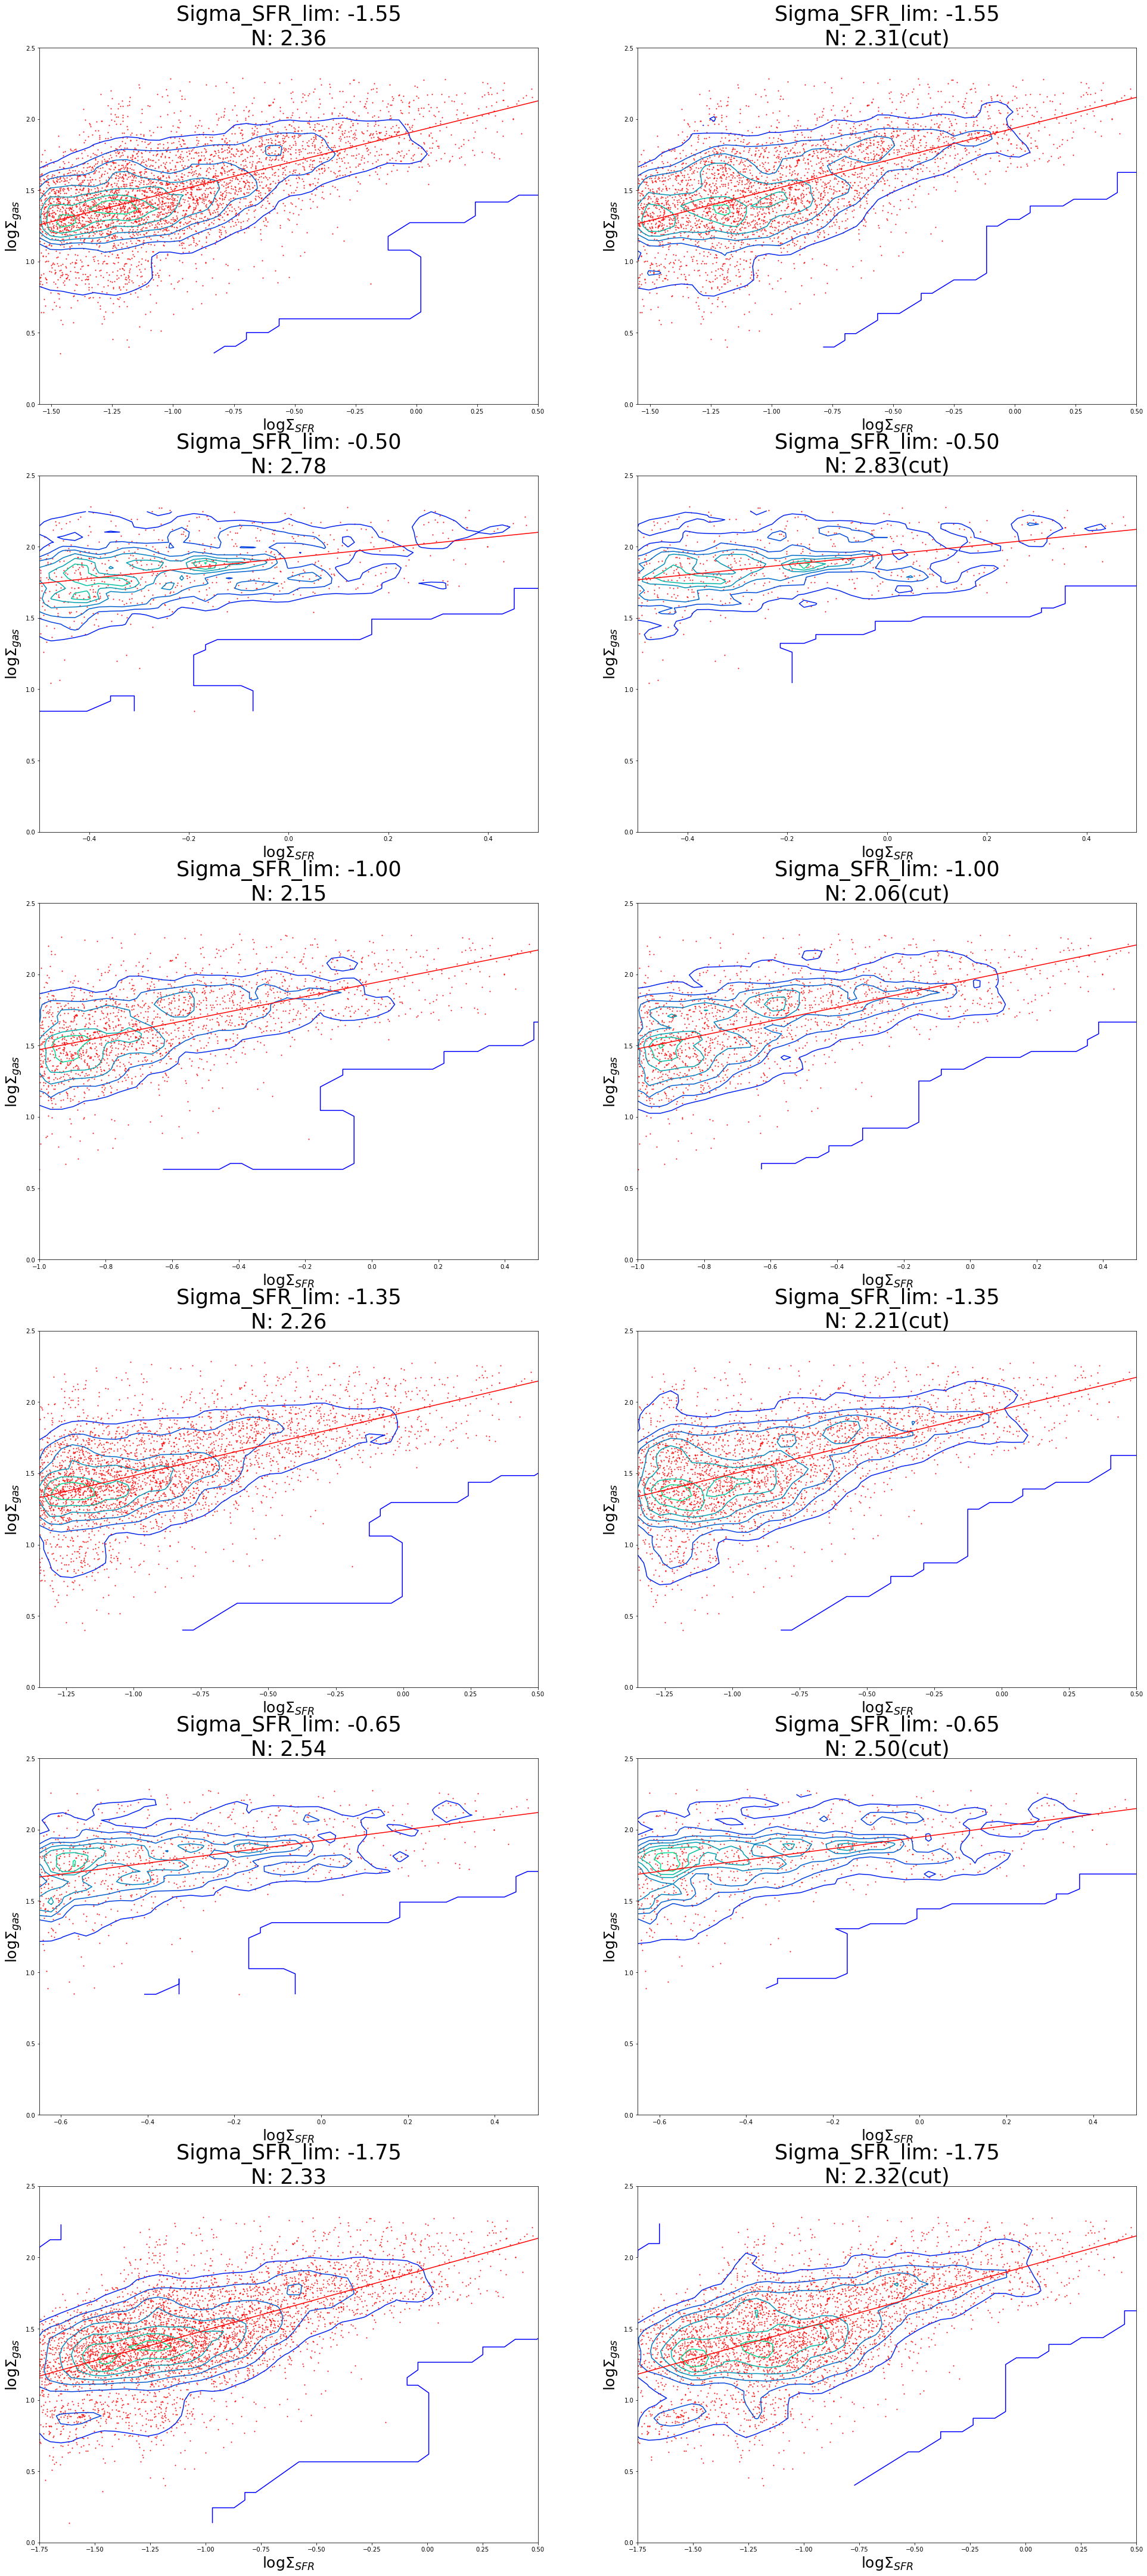

In [30]:
fig = plt.figure(figsize=[33,77])
SFR_lim=[-1.55,-0.5,-1,-1.35,-0.65,-1.75]
i=1

Sigma_SFR_cut = np.zeros((66,96))
Sigma_SFR_cut = Sigma_SFR[60:,:]
Sigma_g_cut = np.zeros((66,96))
Sigma_g_cut = Sigma_g[60:,:]
for lim in SFR_lim:
    plt.subplot(6,2,i)

    indxs = (np.log10(Sigma_SFR)>lim) & (Sigma_g>0)

    x,y = np.ravel(np.log10(Sigma_SFR)[indxs]), np.log10(np.ravel(Sigma_g[indxs]))

    x=np.nan_to_num(x)
    y=np.nan_to_num(y)


    H, xedges, yedges = np.histogram2d(x,y, bins=(50,40))
    xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])

    # Smooth the contours (if astropy is installed)
    if astro_smooth:
        kernel = Gaussian2DKernel(stddev=1.)
        H=convolve(H,kernel)

    clevels = plt.contour(xmesh,ymesh,H.T,lw=.9,cmap='winter')#,zorder=90)
    plt.scatter(x,y, 1., color='r')

    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.plot(x1,y1,'-r')


    plt.xlabel(r'$\log{\Sigma_{SFR}}$',fontsize=25)
    plt.ylabel(r'$\log{\Sigma_{gas}}$',fontsize=25)
    plt.ylim(0.,2.5)
    plt.xlim(lim,0.5)

    plt.title('Sigma_SFR_lim: {:2.2f}'.format(lim)+'\n'+'N: {:2.2f}'.format(1./gradient),fontsize=35)
    
    
    
    plt.subplot(6,2,i+1)
    
    indxs = (np.log10(Sigma_SFR_cut)>lim) & (Sigma_g_cut>0)

    x,y = np.ravel(np.log10(Sigma_SFR_cut)[indxs]), np.ravel(np.log10(Sigma_g_cut)[indxs])

    x=np.nan_to_num(x)
    y=np.nan_to_num(y)


    H, xedges, yedges = np.histogram2d(x,y, bins=(50,40))
    xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])

    # Smooth the contours (if astropy is installed)
    if astro_smooth:
        kernel = Gaussian2DKernel(stddev=1.)
        H=convolve(H,kernel)

    clevels = plt.contour(xmesh,ymesh,H.T,lw=.9,cmap='winter')#,zorder=90)
    plt.scatter(x,y, 1., color='r')

    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.plot(x1,y1,'-r')


    plt.xlabel(r'$\log{\Sigma_{SFR}}$',fontsize=25)
    plt.ylabel(r'$\log{\Sigma_{gas}}$',fontsize=25)
    plt.ylim(0,2.5)
    plt.xlim(lim,0.5)

    plt.title('Sigma_SFR_lim: {:2.2f}'.format(lim)+'\n'+'N: {:2.2f}'.format(1./gradient)+'(cut)',fontsize=35)
    i+=2
    
plt.show(block=False)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5, 1.0, 'Sigma_SFR_lim: -3.00\nN: 2.00')

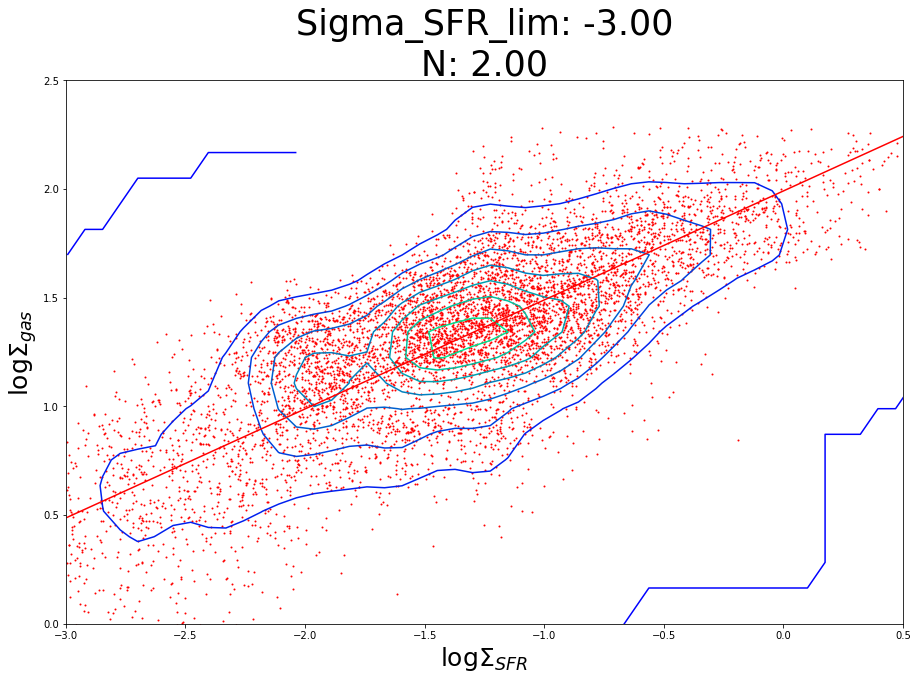

In [31]:
fig = plt.figure(figsize=[15,10])
indxs = (np.log10(Sigma_SFR)>-3) & (Sigma_g>0)

x,y = np.ravel(np.log10(Sigma_SFR)[indxs]), np.log10(np.ravel(Sigma_g[indxs]))

x=np.nan_to_num(x)
y=np.nan_to_num(y)


H, xedges, yedges = np.histogram2d(x,y, bins=(50,40))
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])
# Smooth the contours (if astropy is installed)
if astro_smooth:
    kernel = Gaussian2DKernel(stddev=1.)
    H=convolve(H,kernel)

clevels = plt.contour(xmesh,ymesh,H.T,lw=.9,cmap='winter')#,zorder=90)
plt.scatter(x,y, 1., color='r')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x1,y1,'-r')


plt.xlabel(r'$\log{\Sigma_{SFR}}$',fontsize=25)
plt.ylabel(r'$\log{\Sigma_{gas}}$',fontsize=25)
plt.ylim(0.,2.5)
plt.xlim(-3,0.5)

plt.title('Sigma_SFR_lim: {:2.2f}'.format(-3)+'\n'+'N: {:2.2f}'.format(1./gradient),fontsize=35)
    

Будем строить N для $H_{\alpha}$ и $\Sigma_{H2}$

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

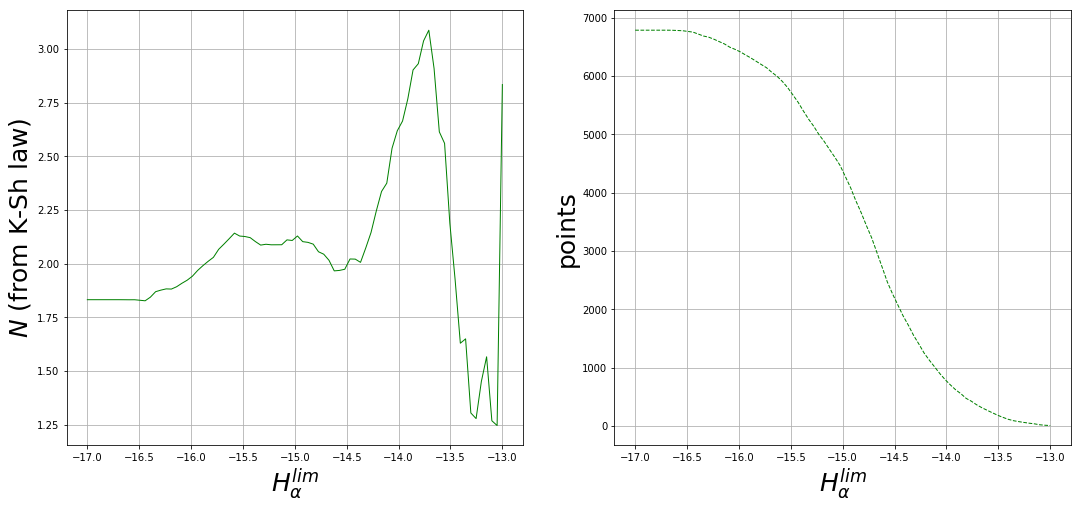

In [28]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_H2, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_H2, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

In [29]:
from scipy import stats

def func(x, beta,alpha):
    return alpha*x + beta

H_alpha = np.load('./data/H_alpha.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')

N_HI = []
points_HI = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_HI[k][l] > 0.) :
                
                
                x.append(np.log10(Sigma_HI[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_HI.append(1./gradient)
    points_HI.append(len(y))        

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

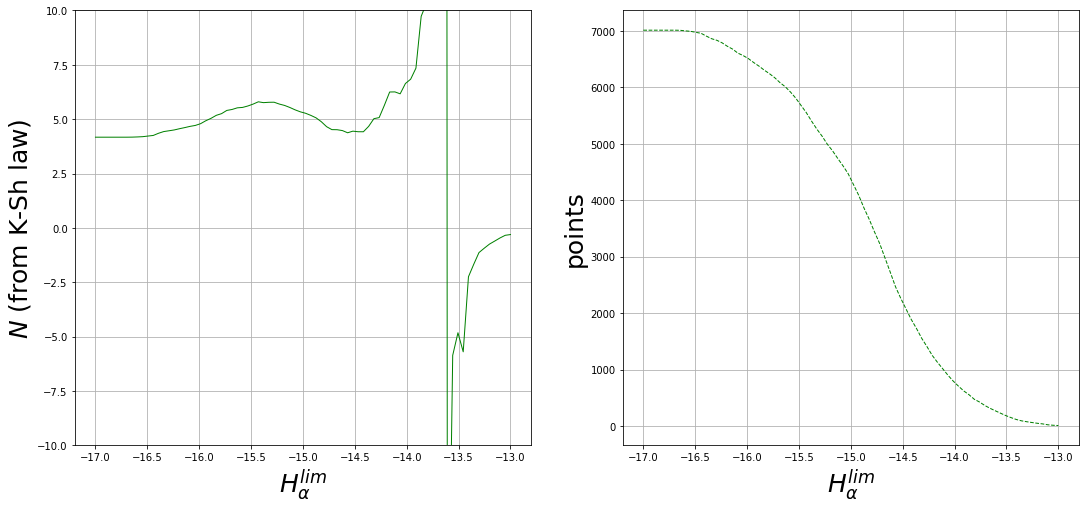

In [39]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_HI, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)
plt.ylim(-10,10)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_HI, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

In [35]:
from scipy import stats

def func(x, beta,alpha):
    return alpha*x + beta

H_alpha = np.load('./data/H_alpha.npy')

N_gas = []
points_gas = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_g[k][l] > 0.) :
                
                x.append(np.log10(Sigma_g[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_gas.append(1./gradient)
    points_gas.append(len(y))         

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

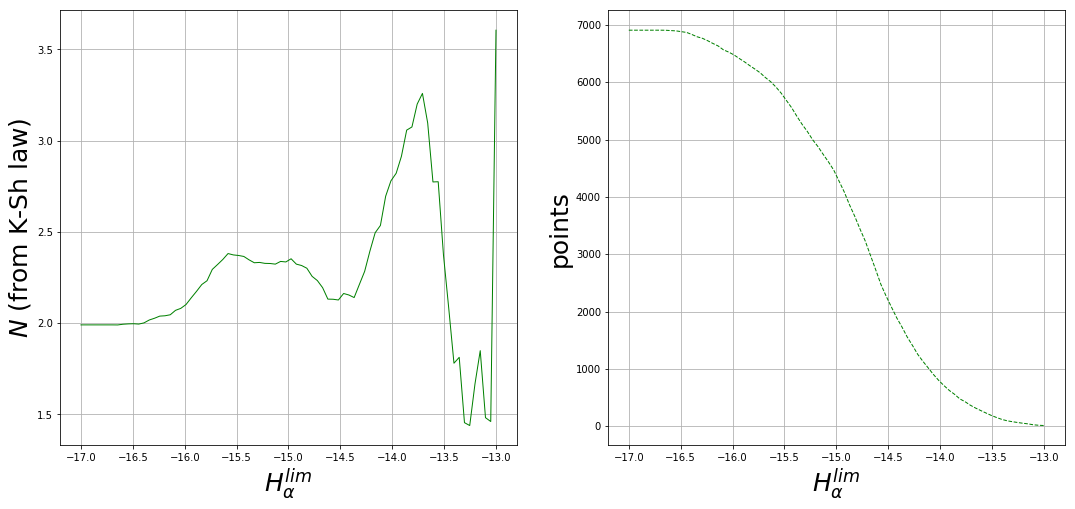

In [36]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_gas, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_gas, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

In [34]:
counts = np.zeros((40,40)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.2, 2.2, 40)):
    for i, hlim in enumerate(np.linspace(-14., -12.0, 40)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_H2[k][l]) <= gas+0.05) & (hlim <= np.log10(H_alpha[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                        x.append(np.log10(Sigma_H2[k][l]))
                        y.append(np.log10(H_alpha[k][l]))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


In [35]:
gradient1, intercept1, r_value, p_value, std_err = stats.linregress(x,y)
a1 = gradient1 
b1 = intercept1
gradient2, intercept2, r_value, p_value, std_err = stats.linregress(y,x)  
a2 =1. / gradient2
b2 = -intercept2/gradient2
print(a1,b1)
print(a2,b2)
popt,pcov = curve_fit(func,y,x)#,p0=guesses)
a =1. / popt[1]
b = -popt[0]/popt[1]
print(a,b)

0.42246517639081754 -14.375894944603429
2.6409124309422745 -18.045862396105502
2.640912425851262 -18.04586226338406


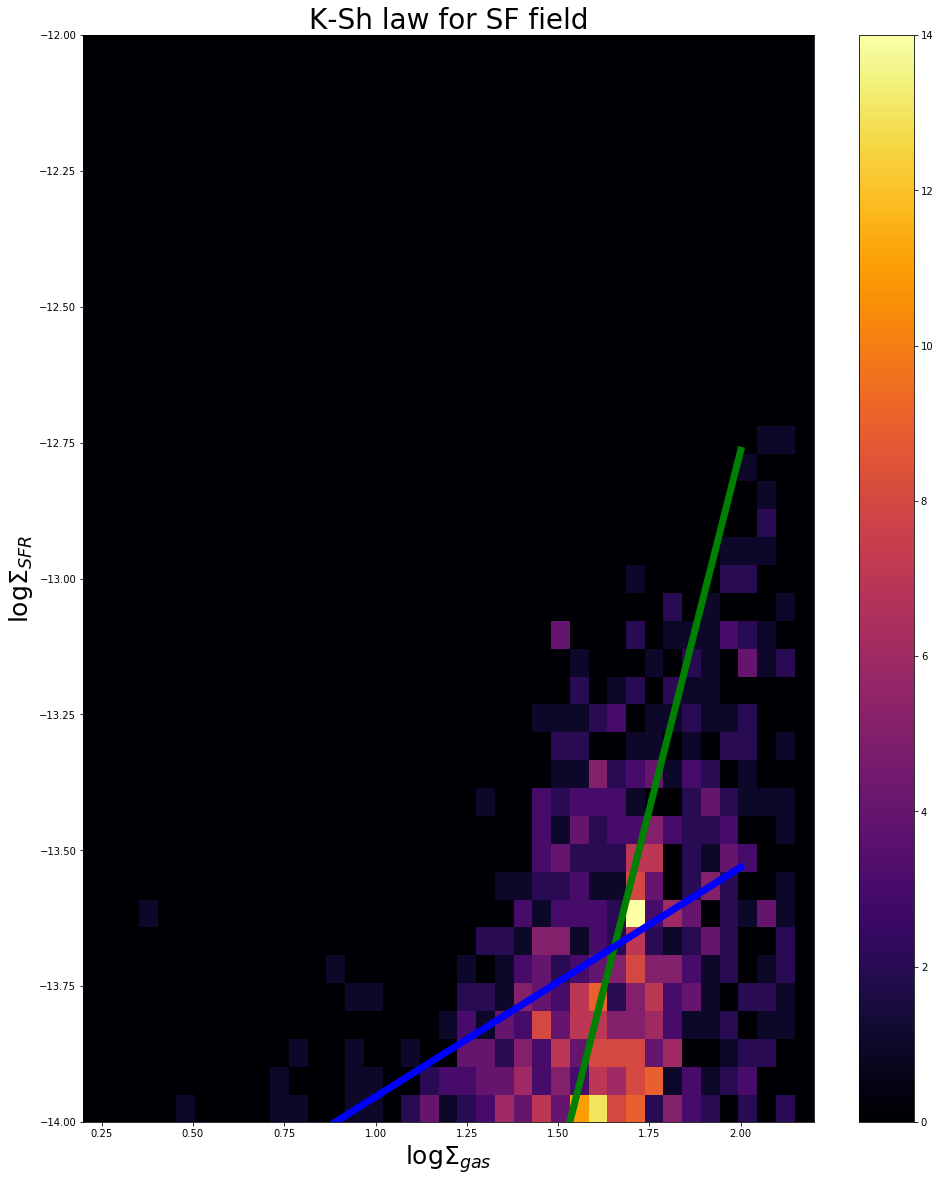

In [36]:
xx, yy = np.meshgrid(np.linspace(0.2, 2.2, 40),np.linspace(-14., -12.0, 40))
fig = plt.figure(figsize=[36, 20])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a01 = (-14. - b1)/a1
a02 = (-14. - b2)/a2
plt.plot([a02, 2.], [a02*a2+b2, 2.*a2+b2], '-', lw=7, color='g')
plt.plot([a01, 2.], [a01*a1+b1, 2.*a1+b1], '-', lw=7, color='b')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

#### Статистическими методами был подобран пороги для звёздообразования $\log{H_{alpha}}$, надём эквивалентное им значения $\Sigma_{SFR}$

In [7]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.3,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.032083769677450996


In [8]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.18,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.0422946455755916


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.15,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.04531952924242865


In [40]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.1,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.05084934815028251


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -15.05,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.005705390701384224


In [16]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -13.26,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.35179153901404964
